In [385]:
import pandas as pd
import numpy as np

# Read data, look for missing value and Clean data

In [386]:
df_countries = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\C3PreditiveAnalytics1\\Module6\\Country-data.csv")
df_1 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\C3PreditiveAnalytics1\\Module6\\Country-data.csv")

In [387]:
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [388]:
df_1.shape #(167, 10)
df_1.columns # ['country', 'child_mort', 'exports', 'health', 'imports', 
             #  'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_1.isnull().values.any() # False

False

In [389]:
df_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [390]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [391]:
df_1.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [392]:
df_1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Scale data so that PCA can be performed on this data

In [393]:
from sklearn.preprocessing import StandardScaler

In [394]:
standard_scaler = StandardScaler()
df_2 = df_1.drop(columns = ["country"])
df_3 = standard_scaler.fit_transform(df_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [395]:
df_3

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [396]:
df_3.shape

(167, 9)

# PCA

In [397]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver= 'randomized', random_state = 42)

In [398]:
# Fit the scaled data for PCA
pca.fit(df_3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [400]:
# Check the components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [401]:
# Explained variance ratio
pca.explained_variance_ratio_.round(3)

array([0.46 , 0.172, 0.13 , 0.111, 0.073, 0.025, 0.013, 0.01 , 0.007])

# Scree Plot

About 95% of the Information is explained by 5 variables here below

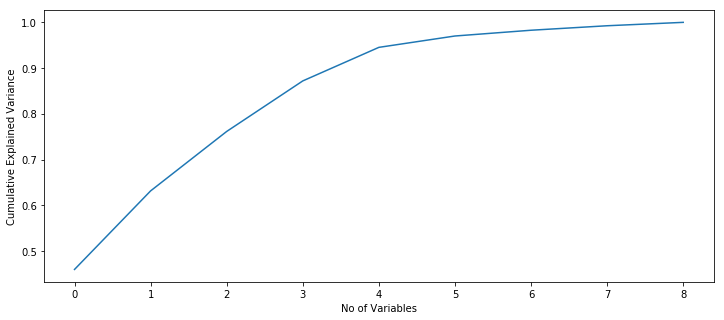

In [402]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Variables")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [404]:
# Checking all the components
pca.components_[4]

array([-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
        0.7148691 ,  0.1082198 , -0.13526221, -0.18016662])

In [405]:
# Find the pincipal components of each column
lst1 = list(df_1.columns)
lst1.remove('country')
df_4 = pd.DataFrame({'col':lst1, 'pca_comp1':pca.components_[0], 'pca_comp2':pca.components_[1], 'pca_comp3':pca.components_[2], 'pca_comp4':pca.components_[3], 'pca_comp4':pca.components_[4] })
df_4

,col,pca_comp1,pca_comp2,pca_comp3,pca_comp4
0,child_mort,-0.419519,0.192884,-0.029544,-0.168970
1,exports,0.283897,0.613163,0.144761,0.057616
2,health,0.150838,-0.243087,-0.596632,0.518000
3,imports,0.161482,0.671821,-0.299927,0.255376
4,income,0.398441,0.022536,0.301548,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.714869
6,life_expec,0.425839,-0.222707,0.113919,0.108220
7,total_fer,-0.403729,0.155233,0.019549,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,-0.180167


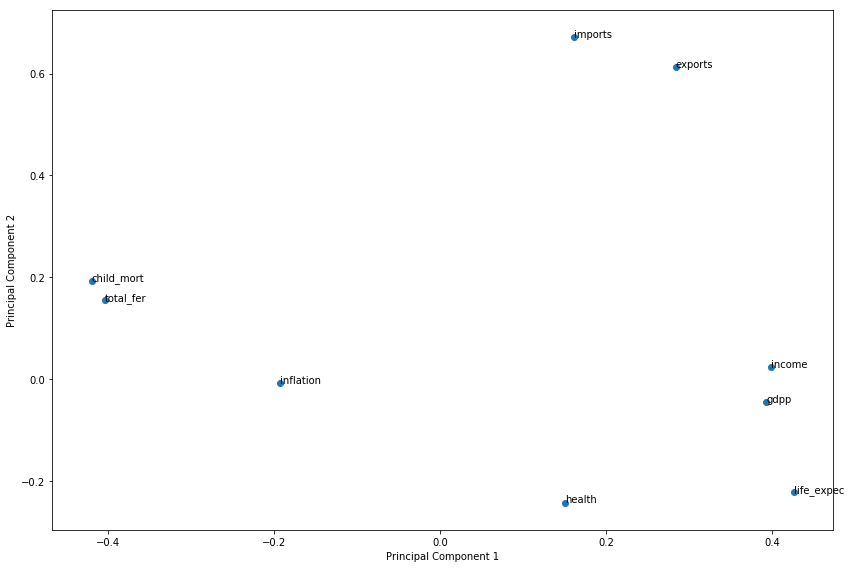

In [406]:
fig = plt.figure(figsize =(12,8))
plt.scatter(df_4.pca_comp1, df_4.pca_comp2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
for i, txt in enumerate(df_4.col):
    plt.annotate(txt, (df_4.pca_comp1[i], df_4.pca_comp2[i]))
plt.tight_layout()
plt.show()
#    print(type(txt), type(df_4.pca_comp1[i]), type(df_4.pca_comp2[i])
#    print(txt, df_4.pca_comp1[i], df_4.pca_comp2[i])
                 

In [407]:

from sklearn.decomposition import IncrementalPCA
Incremental_PCA = IncrementalPCA(n_components=5)
#df_pca = Incremental_PCA.fit_transform(df_3) # df_3 is already scaled in the previous stp therfore just fit
df_pca = Incremental_PCA.fit_transform(df_3)

In [408]:
df_pca.shape #(167, 5)
pcaT = np.transpose(df_pca)
pcaT.shape #(5, 167)

(5, 167)

In [409]:
df_pca_out = pd.DataFrame({'PC1':pcaT[0], 'PC2':pcaT[1], 'PC3':pcaT[2], 'PC4':pcaT[3], 'PC5':pcaT[4] })

In [410]:
df_pca_out.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [411]:
corrmat = np.corrcoef(pcaT)

# The Columns are least correlated with each other therefore PCA has done a good job

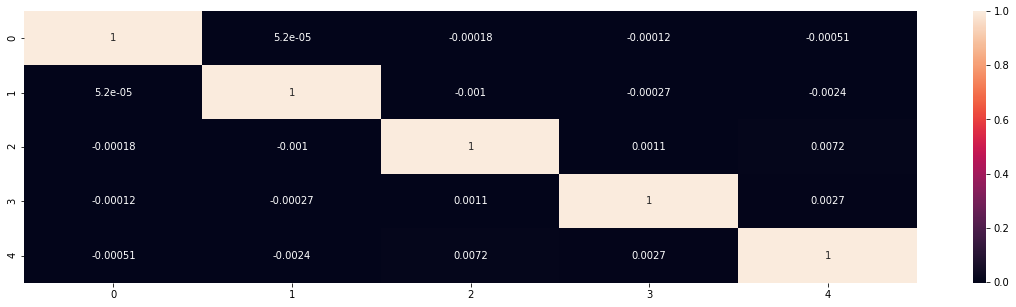

In [412]:

import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(corrmat, annot = True)

In [413]:
corrmat.round(3)

array([[ 1.   ,  0.   , -0.   , -0.   , -0.001],
       [ 0.   ,  1.   , -0.001, -0.   , -0.002],
       [-0.   , -0.001,  1.   ,  0.001,  0.007],
       [-0.   , -0.   ,  0.001,  1.   ,  0.003],
       [-0.001, -0.002,  0.007,  0.003,  1.   ]])

In [414]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())

In [416]:
corrmat_nodiag.round(3)

array([[ 0.   ,  0.   , -0.   , -0.   , -0.001],
       [ 0.   ,  0.   , -0.001, -0.   , -0.002],
       [-0.   , -0.001,  0.   ,  0.001,  0.007],
       [-0.   , -0.   ,  0.001,  0.   ,  0.003],
       [-0.001, -0.002,  0.007,  0.003,  0.   ]])

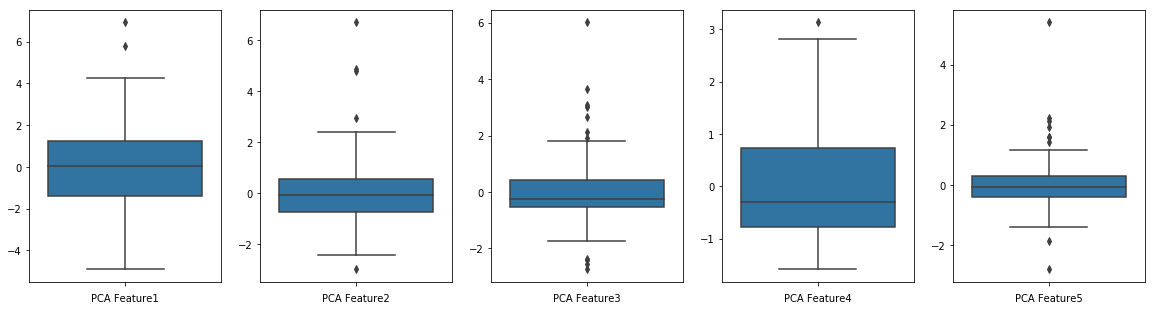

In [417]:
# checking for outliers, But cant remove any since the dataset is really small and we do want to 
# see if any country is and outlier or doing worse that any other country.

plt.figure(figsize = (20,5))

plt.subplot(1, 5, 1)
sns.boxplot(y = pcaT[0])
plt.xlabel("PCA Feature1")

plt.subplot(1, 5, 2)
sns.boxplot(y = pcaT[1])
plt.xlabel("PCA Feature2")

plt.subplot(1, 5, 3)
sns.boxplot(y = pcaT[2])
plt.xlabel("PCA Feature3")

plt.subplot(1, 5, 4)
sns.boxplot(y = pcaT[3])
plt.xlabel("PCA Feature4")

plt.subplot(1, 5, 5)
sns.boxplot(y = pcaT[4])
plt.xlabel("PCA Feature5")

plt.show()

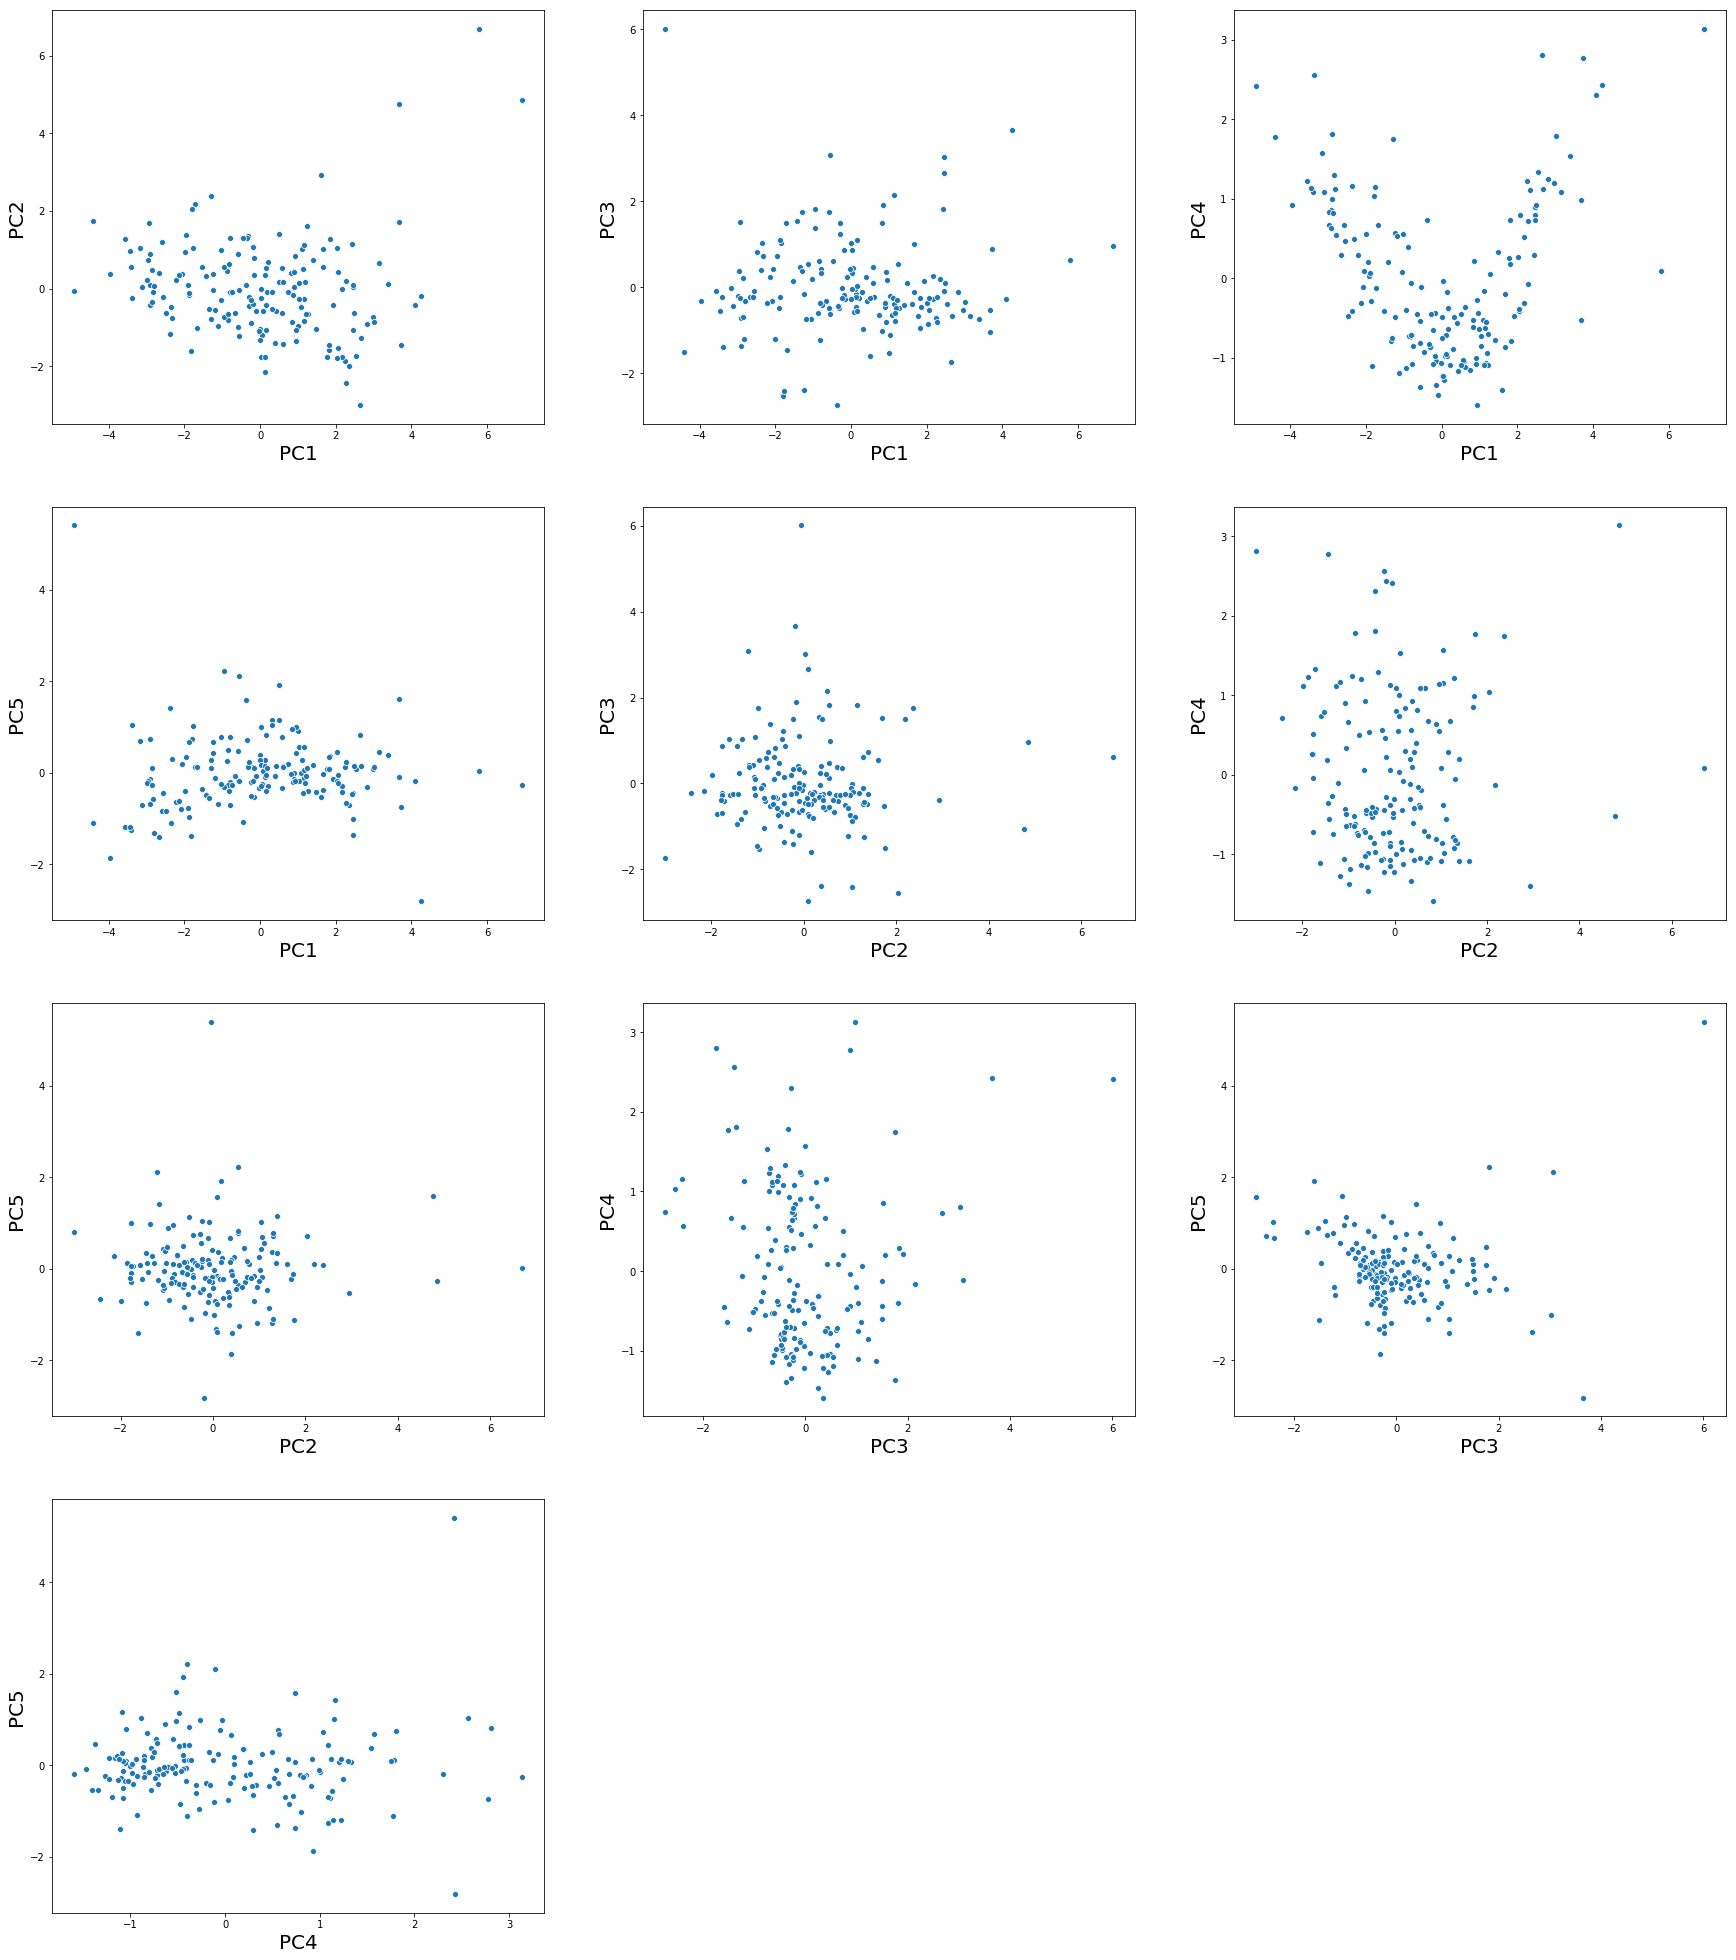

In [419]:
# Scatterplot between every Principal component

plt.figure(figsize=(30,35))

plt.subplot(4, 3, 1)
sns.scatterplot(pcaT[0], pcaT[1])
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)

plt.subplot(4, 3, 2)
sns.scatterplot(pcaT[0], pcaT[2])
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC3", fontsize=20)

plt.subplot(4, 3, 3)
sns.scatterplot(pcaT[0], pcaT[3])
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC4", fontsize=20)

plt.subplot(4, 3, 4)
sns.scatterplot(pcaT[0], pcaT[4])
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.subplot(4, 3, 5)
sns.scatterplot(pcaT[1], pcaT[2])
plt.xlabel("PC2", fontsize=20)
plt.ylabel("PC3", fontsize=20)

plt.subplot(4, 3, 6)
sns.scatterplot(pcaT[1], pcaT[3])
plt.xlabel("PC2", fontsize=20)
plt.ylabel("PC4", fontsize=20)

plt.subplot(4, 3, 7)
sns.scatterplot(pcaT[1], pcaT[4])
plt.xlabel("PC2", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.subplot(4, 3, 8)
sns.scatterplot(pcaT[2], pcaT[3])
plt.xlabel("PC3", fontsize=20)
plt.ylabel("PC4", fontsize=20)

plt.subplot(4, 3, 9)
sns.scatterplot(pcaT[2], pcaT[4])
plt.xlabel("PC3", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.subplot(4, 3, 10)
sns.scatterplot(pcaT[3], pcaT[4])
plt.xlabel("PC4", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.show()

# Heirarchical Clustering

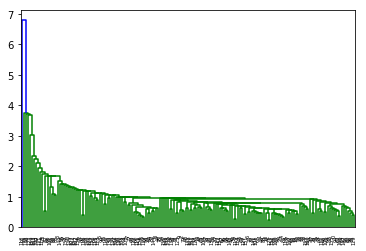

In [421]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Single Method
sm_hc_df = linkage(df_pca_out , method ="single", metric="euclidean")
dendrogram(sm_hc_df)
plt.show()


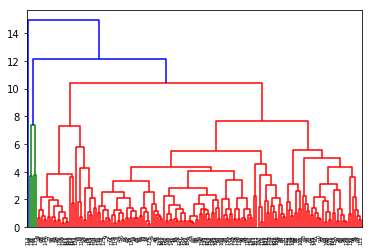

In [422]:
# complete method
cplt_hc_df = linkage(df_pca_out, method = 'complete', metric = 'euclidean')
dendrogram(cplt_hc_df)
plt.show()

# The complete method visually shows nicer clusters

In [423]:
hc_cut = pd.Series(cut_tree(cplt_hc_df, n_clusters = 5).reshape(-1,))
hc_pca = pd.concat([hc_cut, df_pca_out], axis = 1)
hc_pca.columns = ['ClusterId','PC1','PC2','PC3','PC4','PC5']
hc = pd.concat([hc_cut, df_1], axis = 1)
hc.columns = ['ClusterId','country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
hc.head()


,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


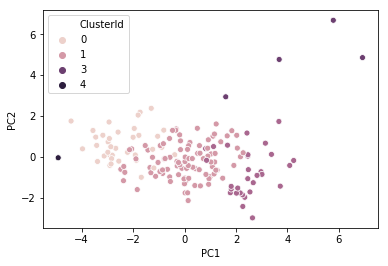

In [424]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterId', data  = hc_pca)
plt.show()


In [425]:
hc['ClusterId'].value_counts()

1    94
0    38
2    30
3     4
4     1
Name: ClusterId, dtype: int64

In [426]:
# Two of these clusters are very small therfore insignificant to make a cluster.
# With 4 Clusters 
# hc['ClusterId'].value_counts()
# 0    132
# 1     30
# 2      4
# 3      1

# With 3 Clusters 
# hc['ClusterId'].value_counts()
# 0    162
# 1      4
# 2      1

# Going back to 5 clusters 

In [427]:
child_mort_df = pd.DataFrame(hc.groupby(['ClusterId']).child_mort.mean())
exports_df = pd.DataFrame(hc.groupby(['ClusterId']).exports.mean())
health_df = pd.DataFrame(hc.groupby(['ClusterId']).health.mean())
imports_df = pd.DataFrame(hc.groupby(['ClusterId']).imports.mean())
income_df = pd.DataFrame(hc.groupby(['ClusterId']).income.mean())
inflation_df = pd.DataFrame(hc.groupby(['ClusterId']).inflation.mean())
life_expec_df = pd.DataFrame(hc.groupby(['ClusterId']).life_expec.mean())
total_fer_df = pd.DataFrame(hc.groupby(['ClusterId']).total_fer.mean())
gdpp_df = pd.DataFrame(hc.groupby(['ClusterId']).gdpp.mean())

In [428]:
clus_out_df1 = pd.concat((pd.Series([0,1,2,3,4]), child_mort_df,exports_df,health_df,imports_df,income_df,inflation_df,life_expec_df,total_fer_df,gdpp_df), axis = 1)
clus_out_df1.columns = ['ClusterId','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
clus_out_df1.head()



,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,96.000000,30.537368,7.028684,47.913158,3508.763158,8.198553,57.884211,5.061579,1793.342105
1,1,25.538298,38.631691,6.183511,45.263467,11871.063830,7.979511,72.460638,2.455106,6878.053191
2,2,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42150.000000
3,3,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


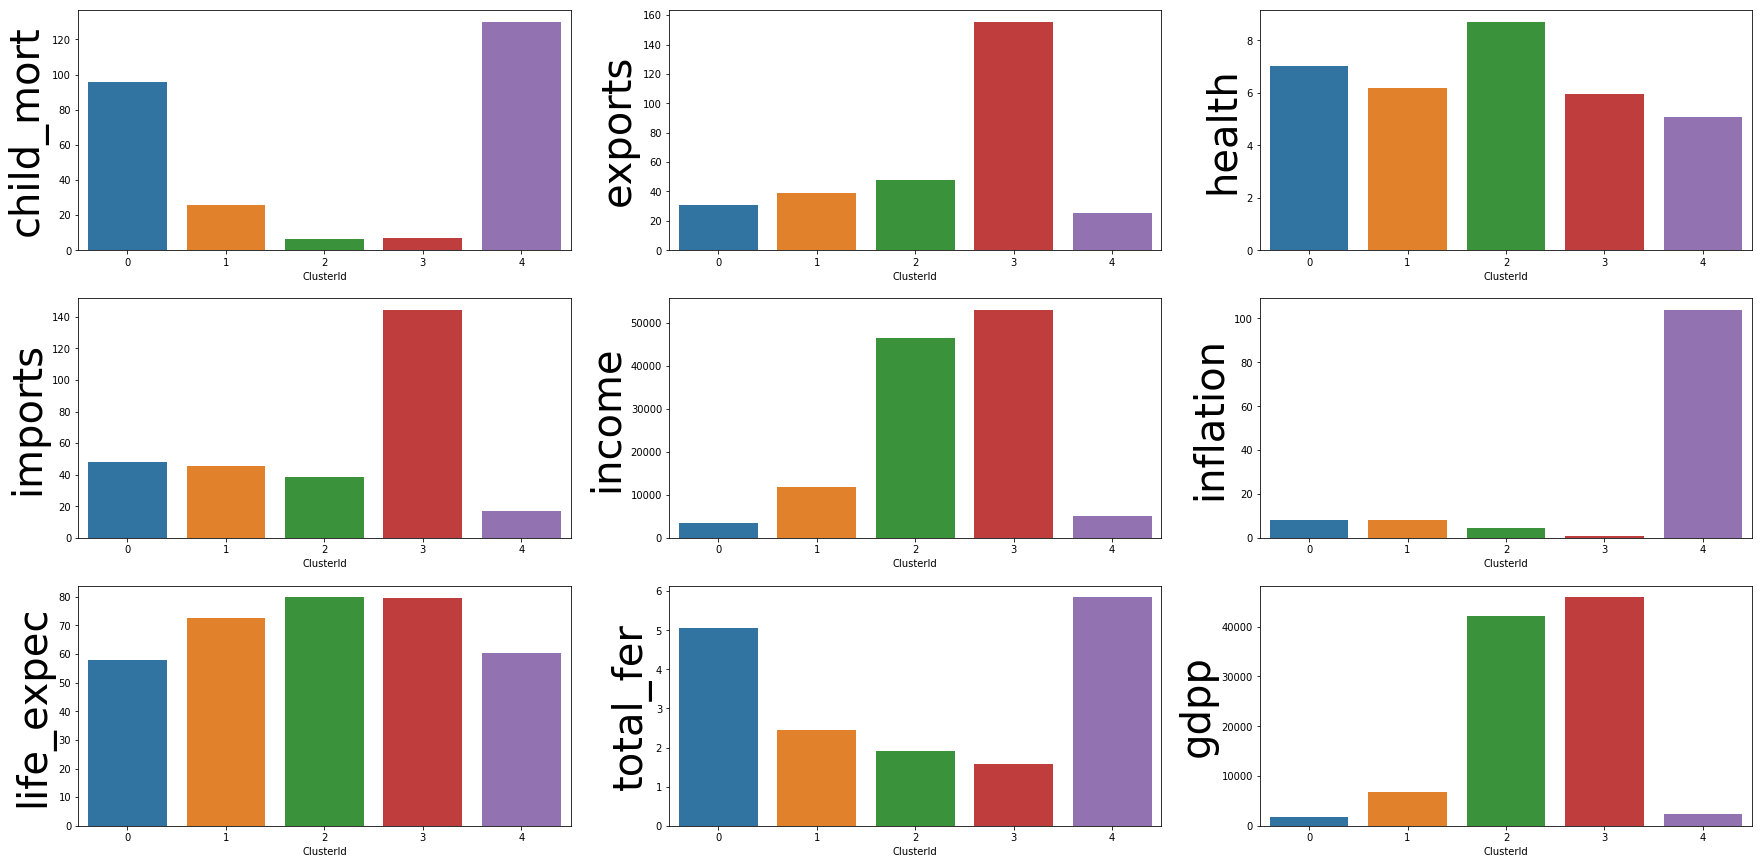

In [429]:
#Compare between the different clusters, the mean of different factors.

plt.figure(figsize=(30,15))

plt.subplot(3, 3, 1)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.child_mort)
plt.xlabel("ClusterId")
plt.ylabel("child_mort", fontsize=40)

plt.subplot(3, 3, 2)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.exports)
plt.xlabel("ClusterId")
plt.ylabel("exports", fontsize=40)

plt.subplot(3, 3, 3)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.health)
plt.xlabel("ClusterId")
plt.ylabel("health", fontsize=40)

plt.subplot(3, 3, 4)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.imports)
plt.xlabel("ClusterId")
plt.ylabel("imports", fontsize=40)

plt.subplot(3, 3, 5)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.income)
plt.xlabel("ClusterId")
plt.ylabel("income", fontsize=40)

plt.subplot(3, 3, 6)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.inflation)
plt.xlabel("ClusterId")
plt.ylabel("inflation", fontsize=40)

plt.subplot(3, 3, 7)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.life_expec)
plt.xlabel("ClusterId")
plt.ylabel("life_expec", fontsize=40)

plt.subplot(3, 3, 8)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.total_fer)
plt.xlabel("ClusterId")
plt.ylabel("total_fer", fontsize=40)

plt.subplot(3, 3, 9)
sns.barplot(x = clus_out_df1.ClusterId, y = clus_out_df1.gdpp)
plt.xlabel("ClusterId")
plt.ylabel("gdpp", fontsize=40)

plt.show()


In [430]:
hc[hc['ClusterId'] == 4]

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,4,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


# Nigeria is a standing out as a different cluster therefore should be considered as one of our Top 5 countries.

In [431]:
hc[hc['ClusterId'] == 0].sort_values(['gdpp', 'inflation','life_expec','income','health','exports','child_mort'], ascending = [True, False,True,True,True, True, False ])
hc[hc['ClusterId'] == 0].sort_values('gdpp', ascending = True)

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,0,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,0,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
37,0,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
112,0,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
132,0,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
106,0,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419
31,0,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
94,0,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459
150,0,Togo,90.3,40.20,7.65,57.3,1210,1.180,58.7,4.87,488
64,0,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547


# K-Means Clustering

# Hopkins Analysis

In [432]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(p):
    d = p.shape[1]
    n = len(p)
    m = int(0.1 * n)
    
    nbrs = NearestNeighbors(n_neighbors=1).fit(p.values)
    
    rand_p = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []

    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(p,axis=0),np.amax(p,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(p.iloc[rand_p[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
        
    return H

# Since the value is greater than 0.5, the dataset has tendencies to form good clusters

In [433]:
hopkins(df_pca_out)

0.7828160847701462

# Silhoutte Analysis

In [434]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df_pca_out)
    sse_.append([k, silhouette_score(df_pca_out, kmeans.labels_)])    

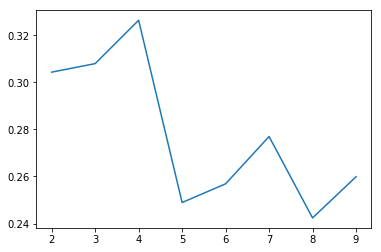

In [435]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

# With 50  Iterations

In [436]:

ssd = []
for k in range(2, 10):
    kmclus = KMeans(n_clusters = k, max_iter = 50)
    kmclus.fit(df_pca_out)
    ssd.append(kmclus.inertia_)

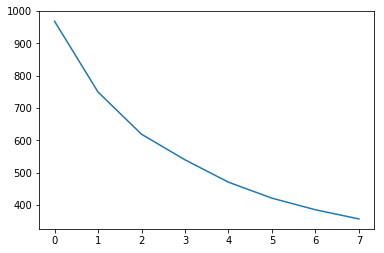

In [437]:
plt.plot(ssd)

# With 100 iterations

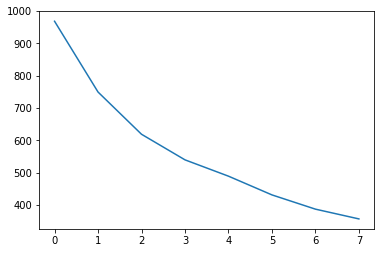

In [438]:
ssd = []
for k in range(2, 10):
    kmclus = KMeans(n_clusters = k, max_iter = 100)
    kmclus.fit(df_pca_out)
    ssd.append(kmclus.inertia_)
plt.plot(ssd)

# The above is to check if the data is actually converging or not.

In [439]:
#Kmeans clustering using 5 Clusters per silhouette analysis and Heirarchical Clustering

model_kmclus = KMeans(n_clusters=5, max_iter = 50, random_state = 50)
model_kmclus.fit(df_pca_out)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [440]:
data_kmclus = pd.concat([df_pca_out, pd.Series(model_kmclus.labels_)], axis = 1)
data_kmclus.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterId']
data_kmclus.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [441]:
data_kmclus['ClusterId'].value_counts()

2    86
1    45
0    32
3     3
4     1
Name: ClusterId, dtype: int64

The clusters from Herarchical clustering and K-means are some what similar in size

In [447]:
# Since 2 Clusters are really small, trying with one cluster less
# With 4 Clusters, data_kmclus['ClusterId'].value_counts() #2-87, 1-47, 0-30, 3-3
# With 3 Clusters, we have 3 significantly big clusters
# We will stick to 5 Clusters since Heirarchical clustering actually was not able to group the
# samller clusters into the bigger one. Instead it grouped all bigger clusters into one.

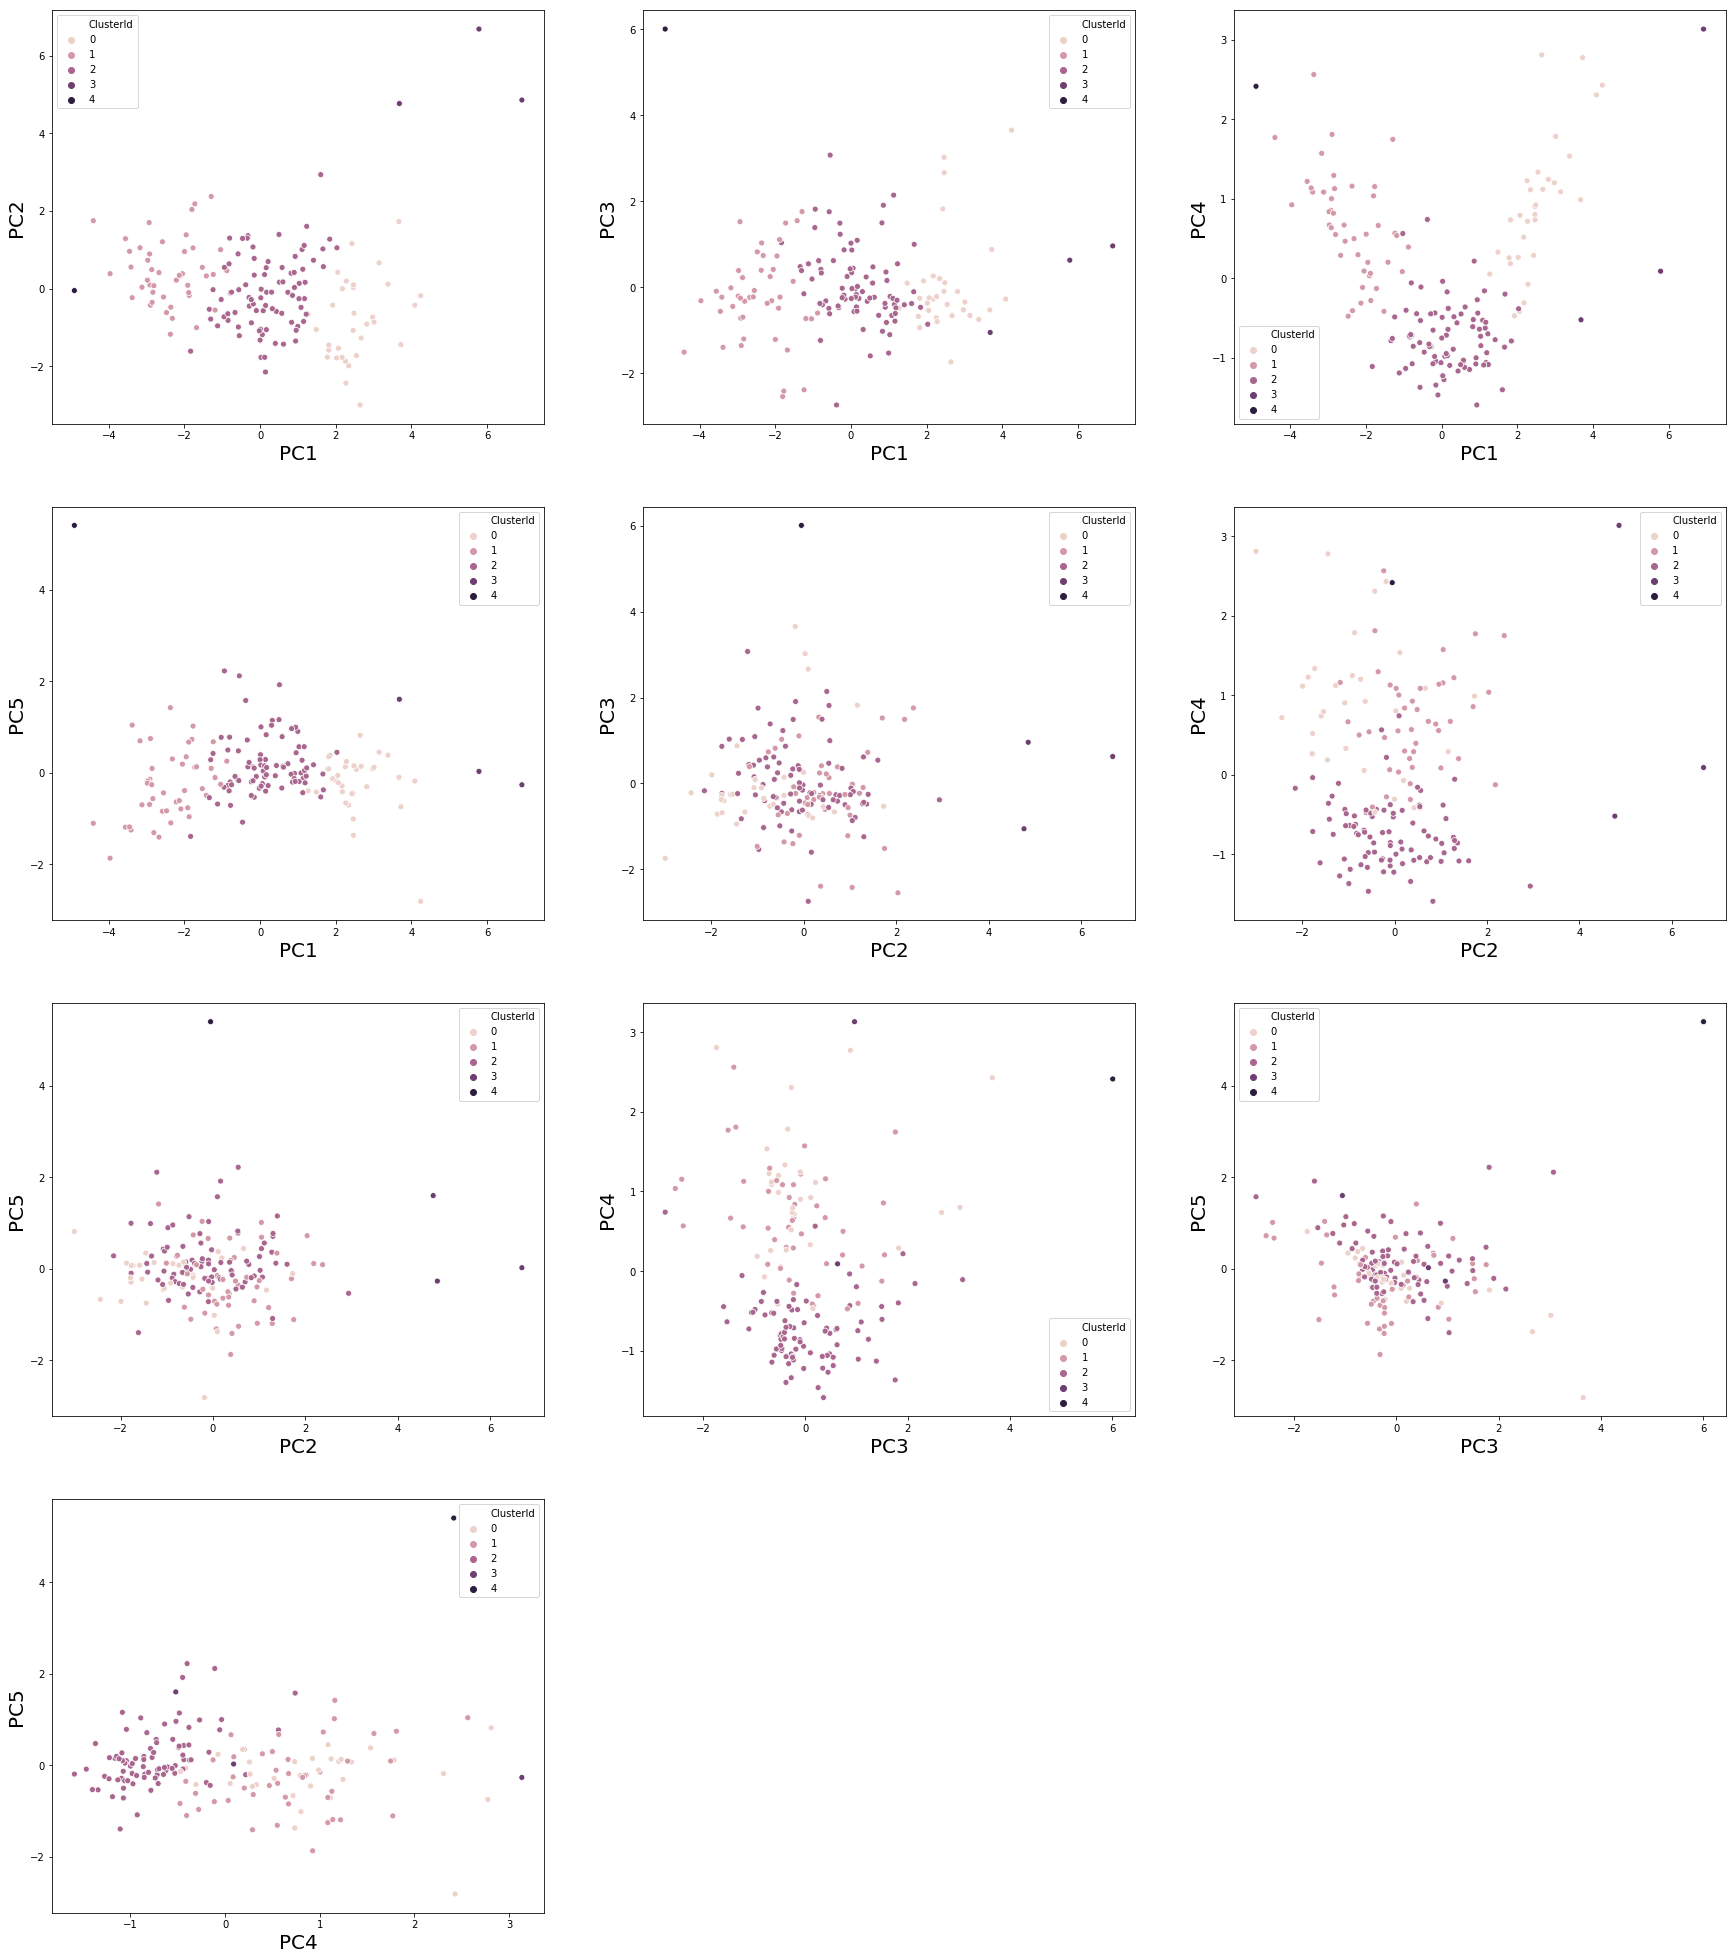

In [452]:
# Scatter plot between every Principal component

plt.figure(figsize=(30,35))

plt.subplot(4, 3, 1)
sns.scatterplot(x = 'PC1', y = 'PC2' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)

plt.subplot(4, 3, 2)
sns.scatterplot(x = 'PC1', y = 'PC3' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC3", fontsize=20)

plt.subplot(4, 3, 3)
sns.scatterplot(x = 'PC1', y = 'PC4' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC4", fontsize=20)

plt.subplot(4, 3, 4)
sns.scatterplot(x = 'PC1', y = 'PC5' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.subplot(4, 3, 5)
sns.scatterplot(x = 'PC2', y = 'PC3' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC2", fontsize=20)
plt.ylabel("PC3", fontsize=20)

plt.subplot(4, 3, 6)
sns.scatterplot(x = 'PC2', y = 'PC4' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC2", fontsize=20)
plt.ylabel("PC4", fontsize=20)

plt.subplot(4, 3, 7)
sns.scatterplot(x = 'PC2', y = 'PC5' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC2", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.subplot(4, 3, 8)
sns.scatterplot(x = 'PC3', y = 'PC4' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC3", fontsize=20)
plt.ylabel("PC4", fontsize=20)

plt.subplot(4, 3, 9)
sns.scatterplot(x = 'PC3', y = 'PC5' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC3", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.subplot(4, 3, 10)
sns.scatterplot(x = 'PC4', y = 'PC5' ,hue = "ClusterId", legend = 'full', data = data_kmclus)
plt.xlabel("PC4", fontsize=20)
plt.ylabel("PC5", fontsize=20)

plt.show()

For some reason, the clusers have better visualizations with principal component 1 

In [453]:
data_clus = pd.concat([df_1, data_kmclus['ClusterId']], axis = 1)
data_clus.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp','ClusterId']
data_clus.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [454]:
child_mort_df = pd.DataFrame(data_clus.groupby(['ClusterId']).child_mort.mean())
exports_df = pd.DataFrame(data_clus.groupby(['ClusterId']).exports.mean())
health_df = pd.DataFrame(data_clus.groupby(['ClusterId']).health.mean())
imports_df = pd.DataFrame(data_clus.groupby(['ClusterId']).imports.mean())
income_df = pd.DataFrame(data_clus.groupby(['ClusterId']).income.mean())
inflation_df = pd.DataFrame(data_clus.groupby(['ClusterId']).inflation.mean())
life_expec_df = pd.DataFrame(data_clus.groupby(['ClusterId']).life_expec.mean())
total_fer_df = pd.DataFrame(data_clus.groupby(['ClusterId']).total_fer.mean())
gdpp_df = pd.DataFrame(data_clus.groupby(['ClusterId']).gdpp.mean())

In [457]:
clus_out_df = pd.concat((pd.Series([0,1,2,3,4]), child_mort_df,exports_df,health_df,imports_df,income_df,inflation_df,life_expec_df,total_fer_df,gdpp_df), axis = 1)
clus_out_df.columns = ['ClusterId','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
clus_out_df.head()

,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788438,42118.750000
1,1,93.384444,29.009111,6.372889,43.060000,3720.955556,9.873889,58.980000,4.999556,1856.044444
2,2,21.867442,41.054523,6.222791,47.754255,12671.744186,7.713884,72.805814,2.326977,6496.069767
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


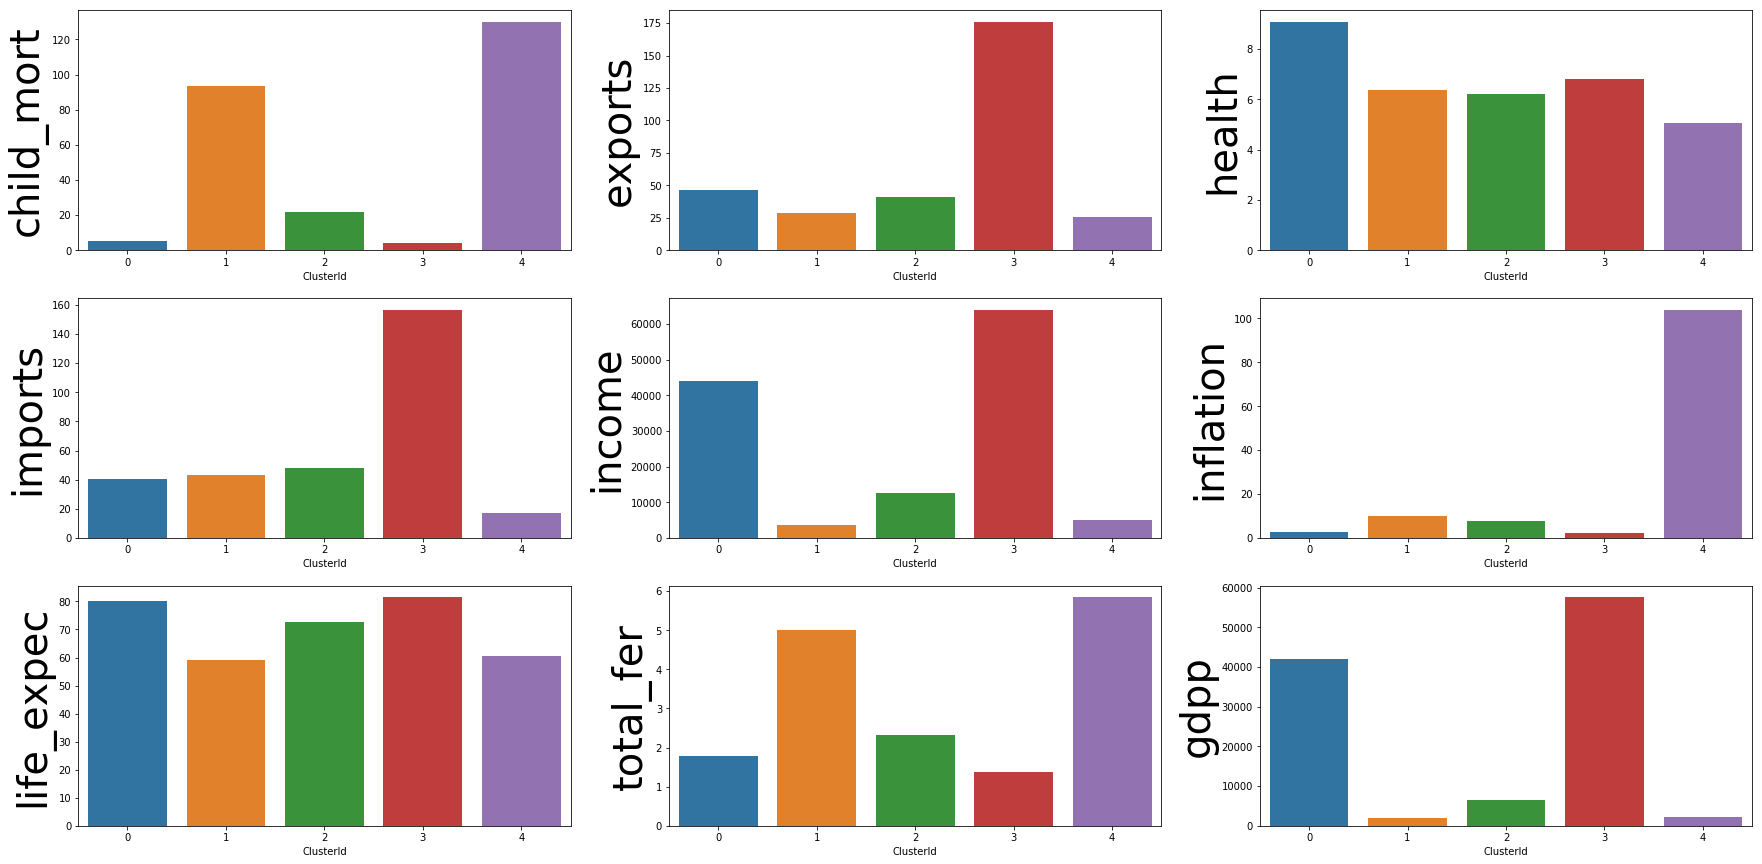

In [458]:
#Compare between the different clusters, the mean of different factors.

plt.figure(figsize=(30,15))

plt.subplot(3, 3, 1)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.child_mort)
plt.xlabel("ClusterId")
plt.ylabel("child_mort", fontsize=40)

plt.subplot(3, 3, 2)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.exports)
plt.xlabel("ClusterId")
plt.ylabel("exports", fontsize=40)

plt.subplot(3, 3, 3)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.health)
plt.xlabel("ClusterId")
plt.ylabel("health", fontsize=40)

plt.subplot(3, 3, 4)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.imports)
plt.xlabel("ClusterId")
plt.ylabel("imports", fontsize=40)

plt.subplot(3, 3, 5)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.income)
plt.xlabel("ClusterId")
plt.ylabel("income", fontsize=40)

plt.subplot(3, 3, 6)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.inflation)
plt.xlabel("ClusterId")
plt.ylabel("inflation", fontsize=40)

plt.subplot(3, 3, 7)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.life_expec)
plt.xlabel("ClusterId")
plt.ylabel("life_expec", fontsize=40)

plt.subplot(3, 3, 8)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.total_fer)
plt.xlabel("ClusterId")
plt.ylabel("total_fer", fontsize=40)

plt.subplot(3, 3, 9)
sns.barplot(x = clus_out_df.ClusterId, y = clus_out_df.gdpp)
plt.xlabel("ClusterId")
plt.ylabel("gdpp", fontsize=40)

plt.show()

In [459]:
data_clus[data_clus['ClusterId'] == 4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,4


In [460]:
data_clus[data_clus['ClusterId'] == 1].sort_values(['gdpp', 'inflation','life_expec','income','health','exports','child_mort'], ascending = True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,1


# Cluster examination comparing Factors

Using the data set from Heirarchical Clustered method
Reasons.
1. There is one clearly poor country, more poor than the others that should not be grouped into another cluster.
   This country forms a single data point cluster
   K-means does merge this country with another cluster with a good no. of data points.
2. Also there is another small cluster with less no. of data points which is doing better than other 
   poor countries. This also stands out while trying to use heirarchical clustering to merge these 
   into a different cluster with more data points. But it fails to merge.

In [461]:

hc_1 = hc.drop(columns = ["ClusterId", "country"])
hc_2 = standard_scaler.fit_transform(hc_1)
hc_3 = hc[["ClusterId", "country"]]
hc_4 = pd.DataFrame(hc_2)
hc_5 = pd.concat((hc_3, hc_4), axis = 1)
hc_5.columns = ['ClusterId','country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


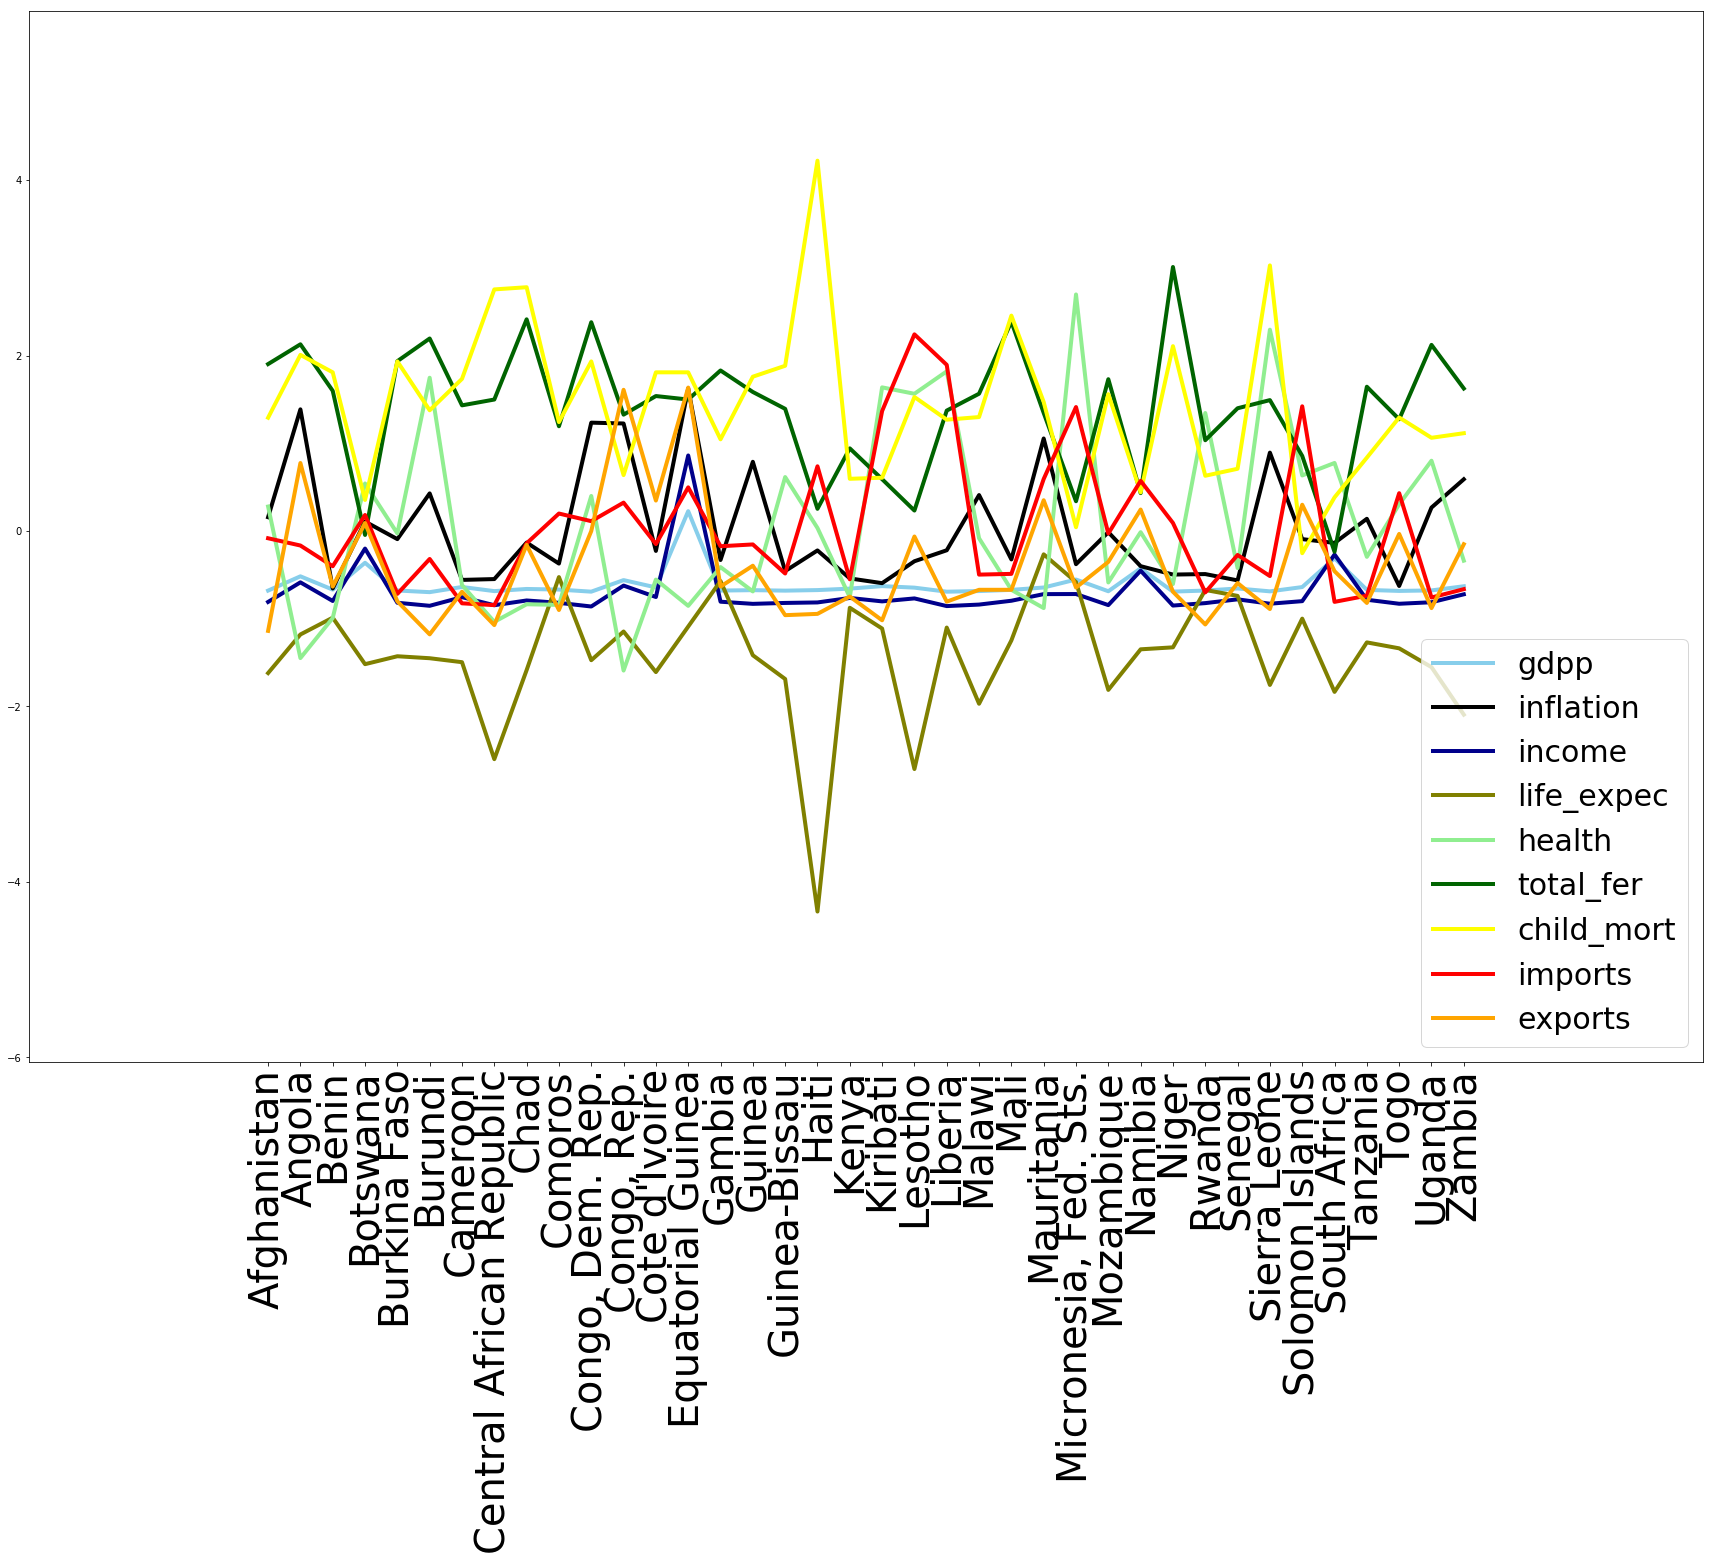

In [462]:
# All factors comparison


plt.figure(figsize = (30, 20))

#'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'
plt.plot('country', 'gdpp', data=hc_5[hc_5['ClusterId'] == 0], color='skyblue', linewidth=4)
plt.plot('country', 'inflation', data=hc_5[hc_5['ClusterId'] == 0], color='black', linewidth=4)
plt.plot('country', 'income', data=hc_5[hc_5['ClusterId'] == 0], color='darkblue', linewidth=4)
plt.plot('country', 'life_expec', data=hc_5[hc_5['ClusterId'] == 0], color='olive', linewidth=4)
plt.plot('country', 'health', data=hc_5[hc_5['ClusterId'] == 0], color='lightgreen', linewidth=4)
plt.plot('country', 'total_fer', data=hc_5[hc_5['ClusterId'] == 0], color='darkgreen', linewidth=4)
plt.plot('country', 'child_mort', data=hc_5[hc_5['ClusterId'] == 0], color='yellow', linewidth=4)
plt.plot('country', 'imports', data=hc_5[hc_5['ClusterId'] == 0], color='red', linewidth=4)
plt.plot('country', 'exports', data=hc_5[hc_5['ClusterId'] == 0], color='orange', linewidth=4)

plt.xticks(hc_5[hc_5['ClusterId'] == 0]['country'], hc_5[hc_5['ClusterId'] == 0]['country'], rotation='vertical', fontsize=40)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.legend(fontsize=30)
plt.show()


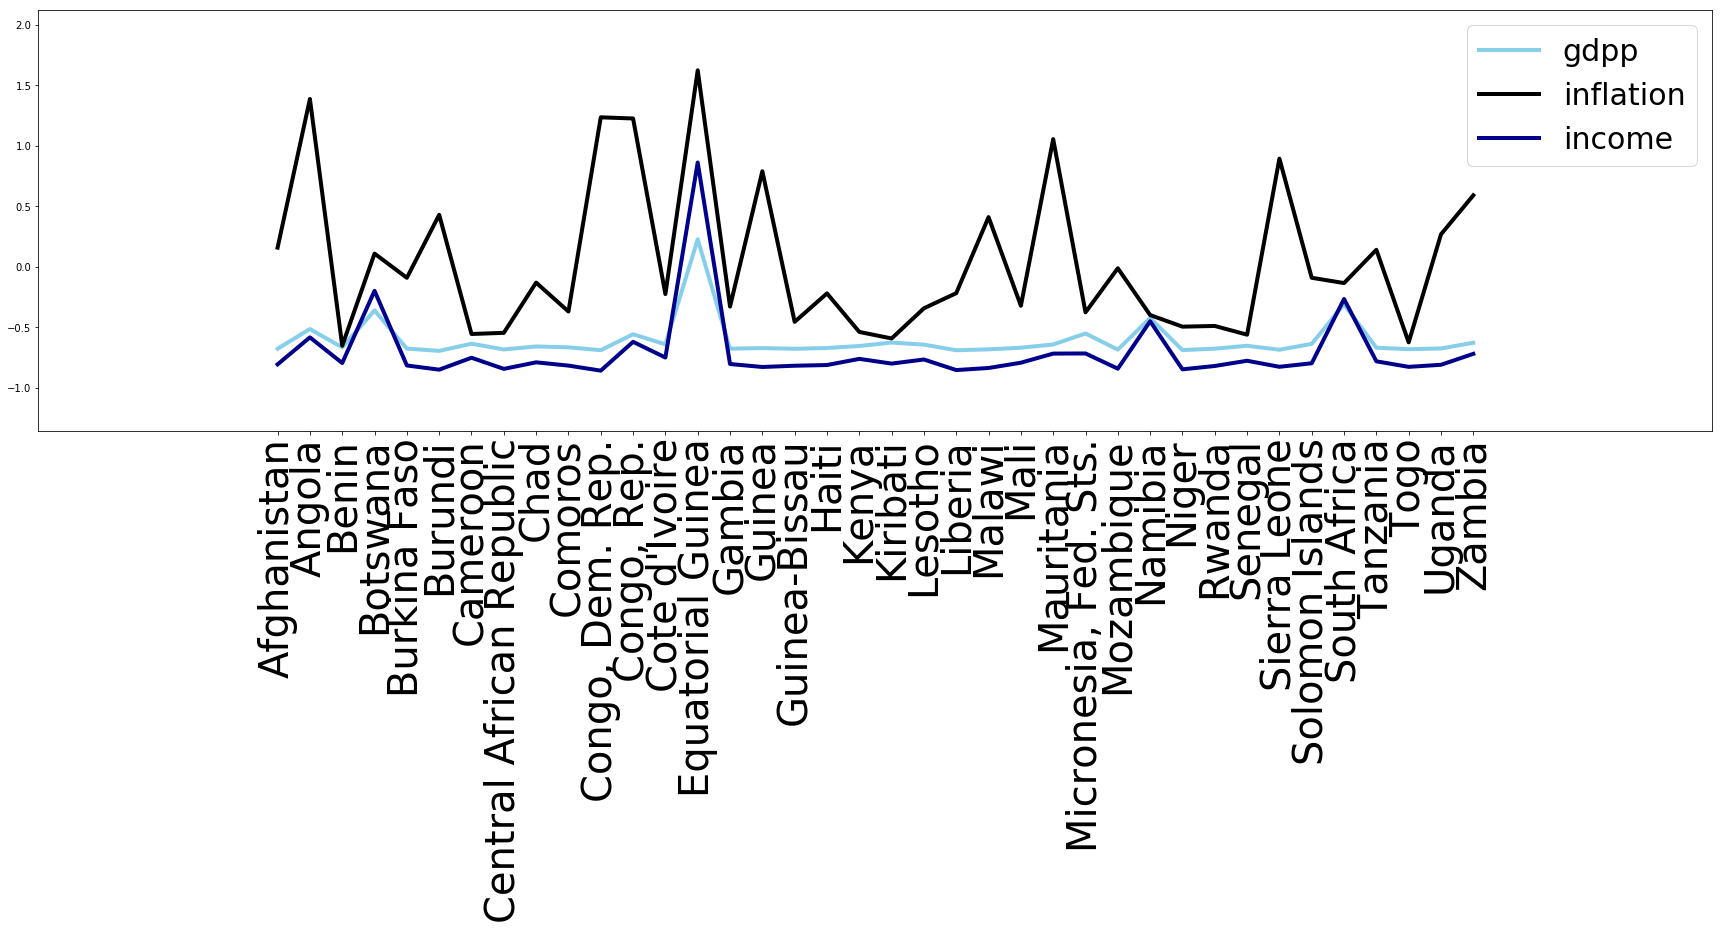

In [364]:
#High Inflation, Low Income, Low GDP

plt.figure(figsize = (30, 8))

plt.plot('country', 'gdpp', data=hc_5[hc_5['ClusterId'] == 0], color='skyblue', linewidth=4)
plt.plot('country', 'inflation', data=hc_5[hc_5['ClusterId'] == 0], color='black', linewidth=4)
plt.plot('country', 'income', data=hc_5[hc_5['ClusterId'] == 0], color='darkblue', linewidth=4)

plt.xticks(hc_5[hc_5['ClusterId'] == 0]['country'], hc_5[hc_5['ClusterId'] == 0]['country'], rotation='vertical', fontsize=40)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.legend(fontsize=30)
plt.show()

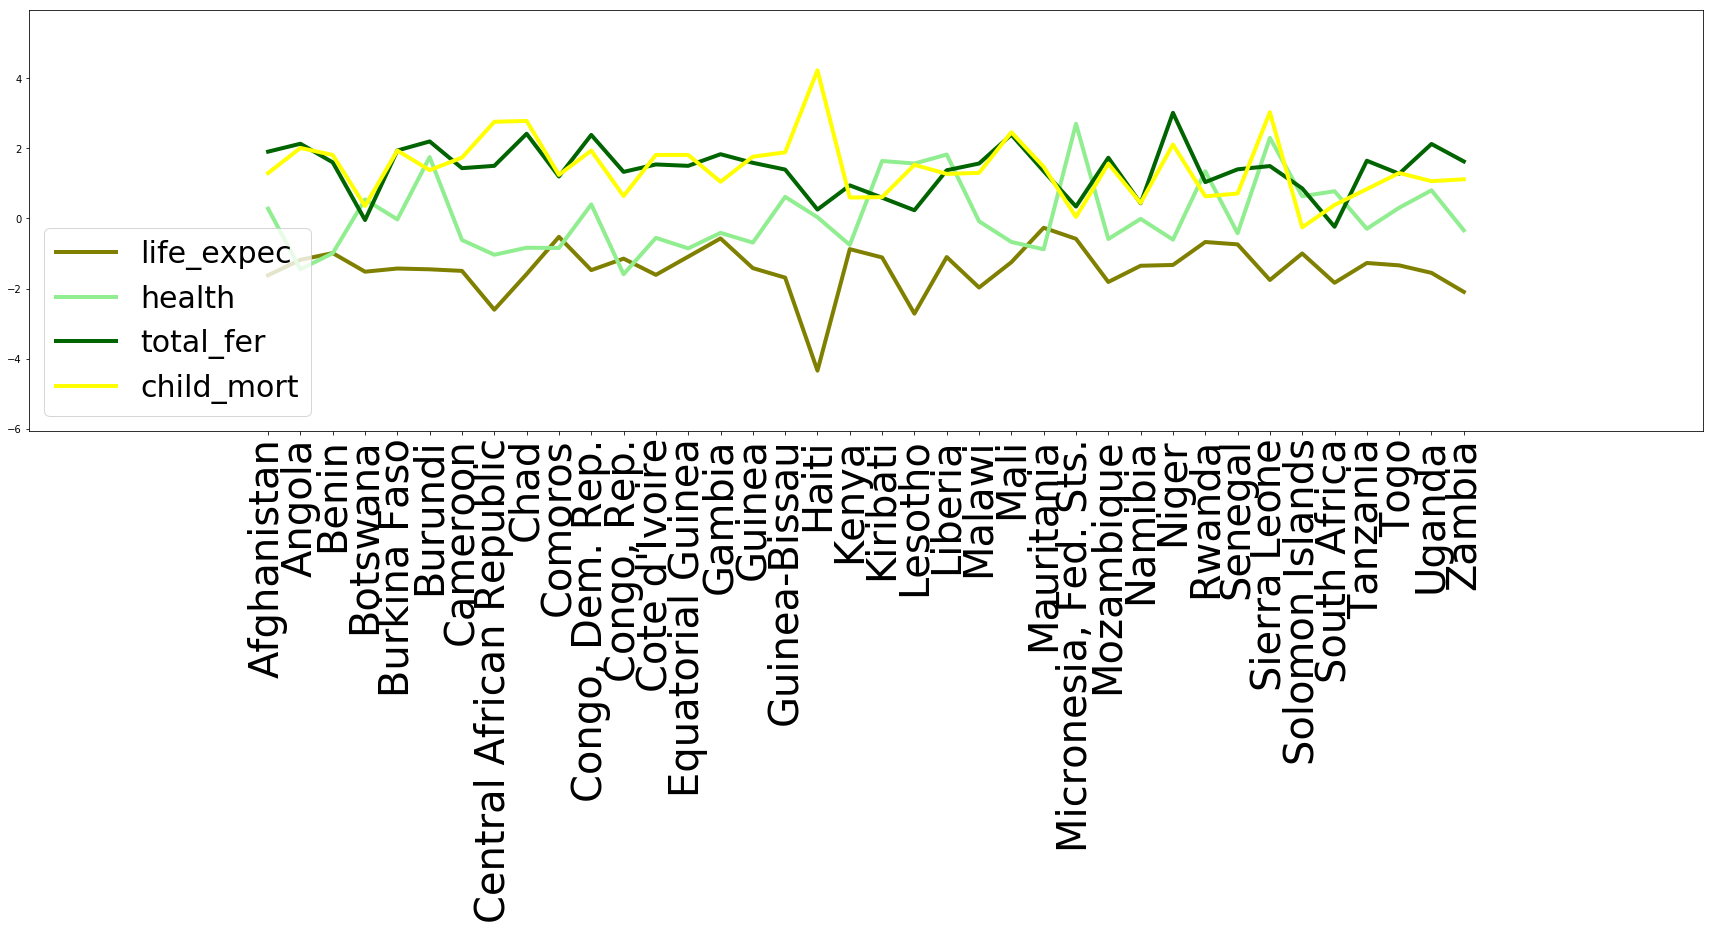

In [383]:
#Low Life Expectancy, High Fertility, High Child Mortality, Low Health Spending

plt.figure(figsize = (30, 8))

plt.plot('country', 'life_expec', data=hc_5[hc_5['ClusterId'] == 0], color='olive', linewidth=4)
plt.plot('country', 'health', data=hc_5[hc_5['ClusterId'] == 0], color='lightgreen', linewidth=4)
plt.plot('country', 'total_fer', data=hc_5[hc_5['ClusterId'] == 0], color='darkgreen', linewidth=4)
plt.plot('country', 'child_mort', data=hc_5[hc_5['ClusterId'] == 0], color='yellow', linewidth=4)

plt.xticks(hc_5[hc_5['ClusterId'] == 0]['country'], hc_5[hc_5['ClusterId'] == 0]['country'], rotation='vertical', fontsize=40)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.legend(fontsize=30)
plt.show()

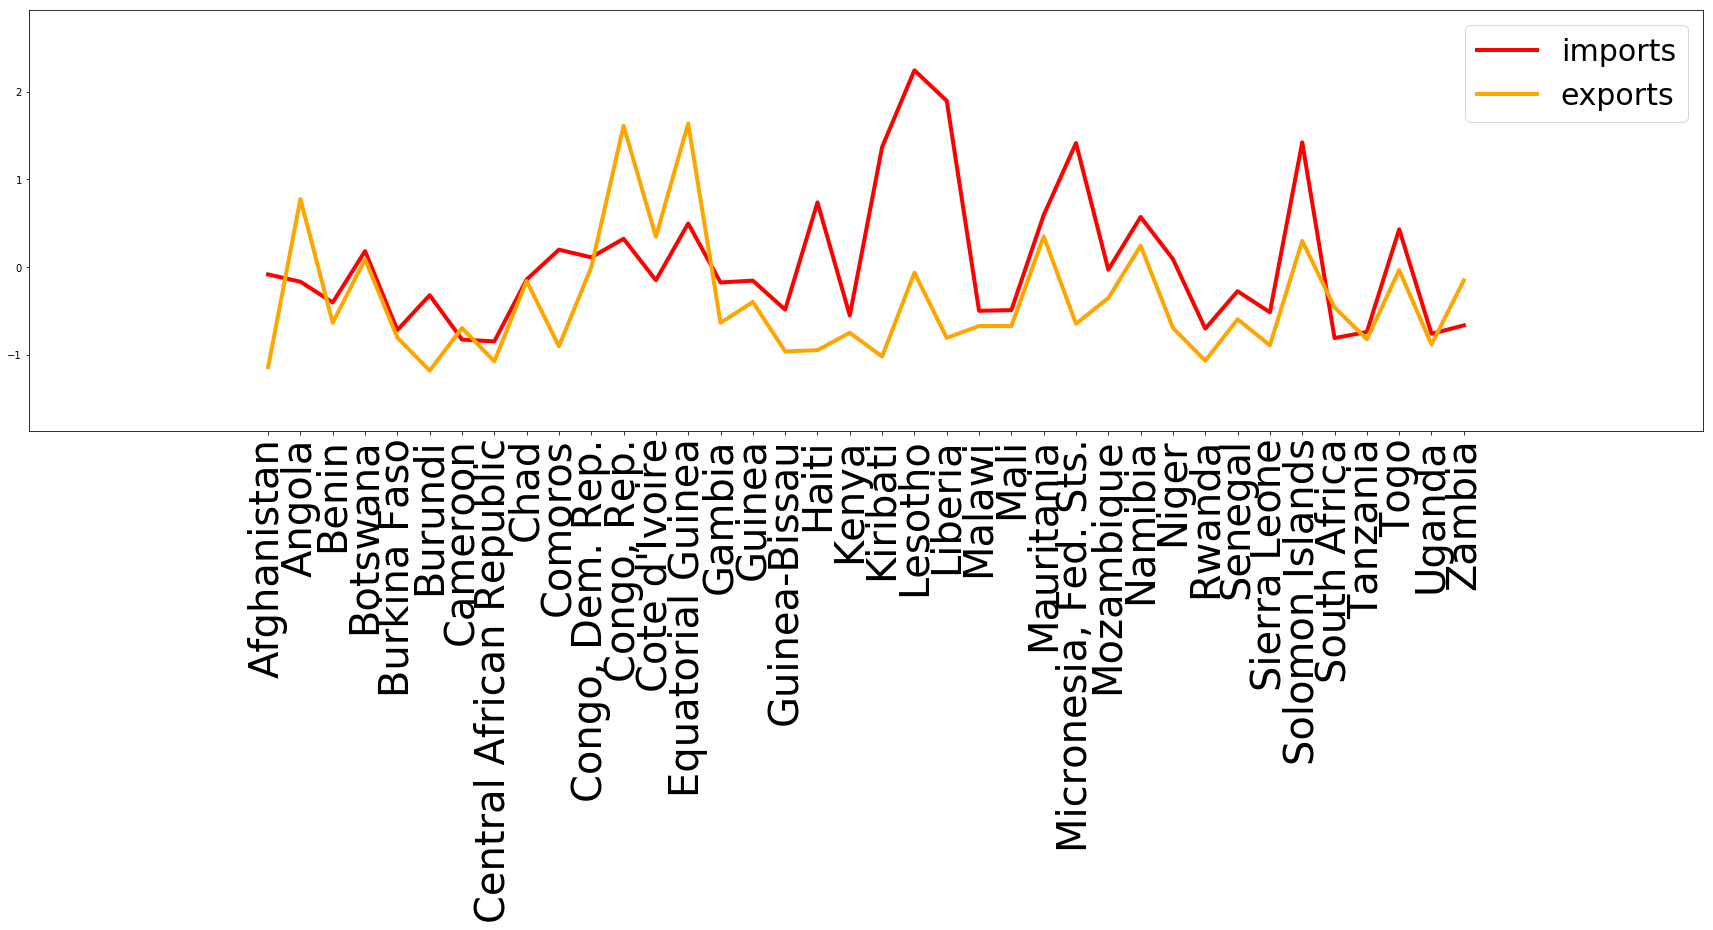

In [362]:
#Imports higher than Export
plt.figure(figsize = (30, 8))

plt.plot('country', 'imports', data=hc_5[hc_5['ClusterId'] == 0], color='red', linewidth=4)
plt.plot('country', 'exports', data=hc_5[hc_5['ClusterId'] == 0], color='orange', linewidth=4)

plt.xticks(hc_5[hc_5['ClusterId'] == 0]['country'], hc_5[hc_5['ClusterId'] == 0]['country'], rotation='vertical', fontsize=40)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.legend(fontsize=30)
plt.show()

# Narrow down to a few Countries

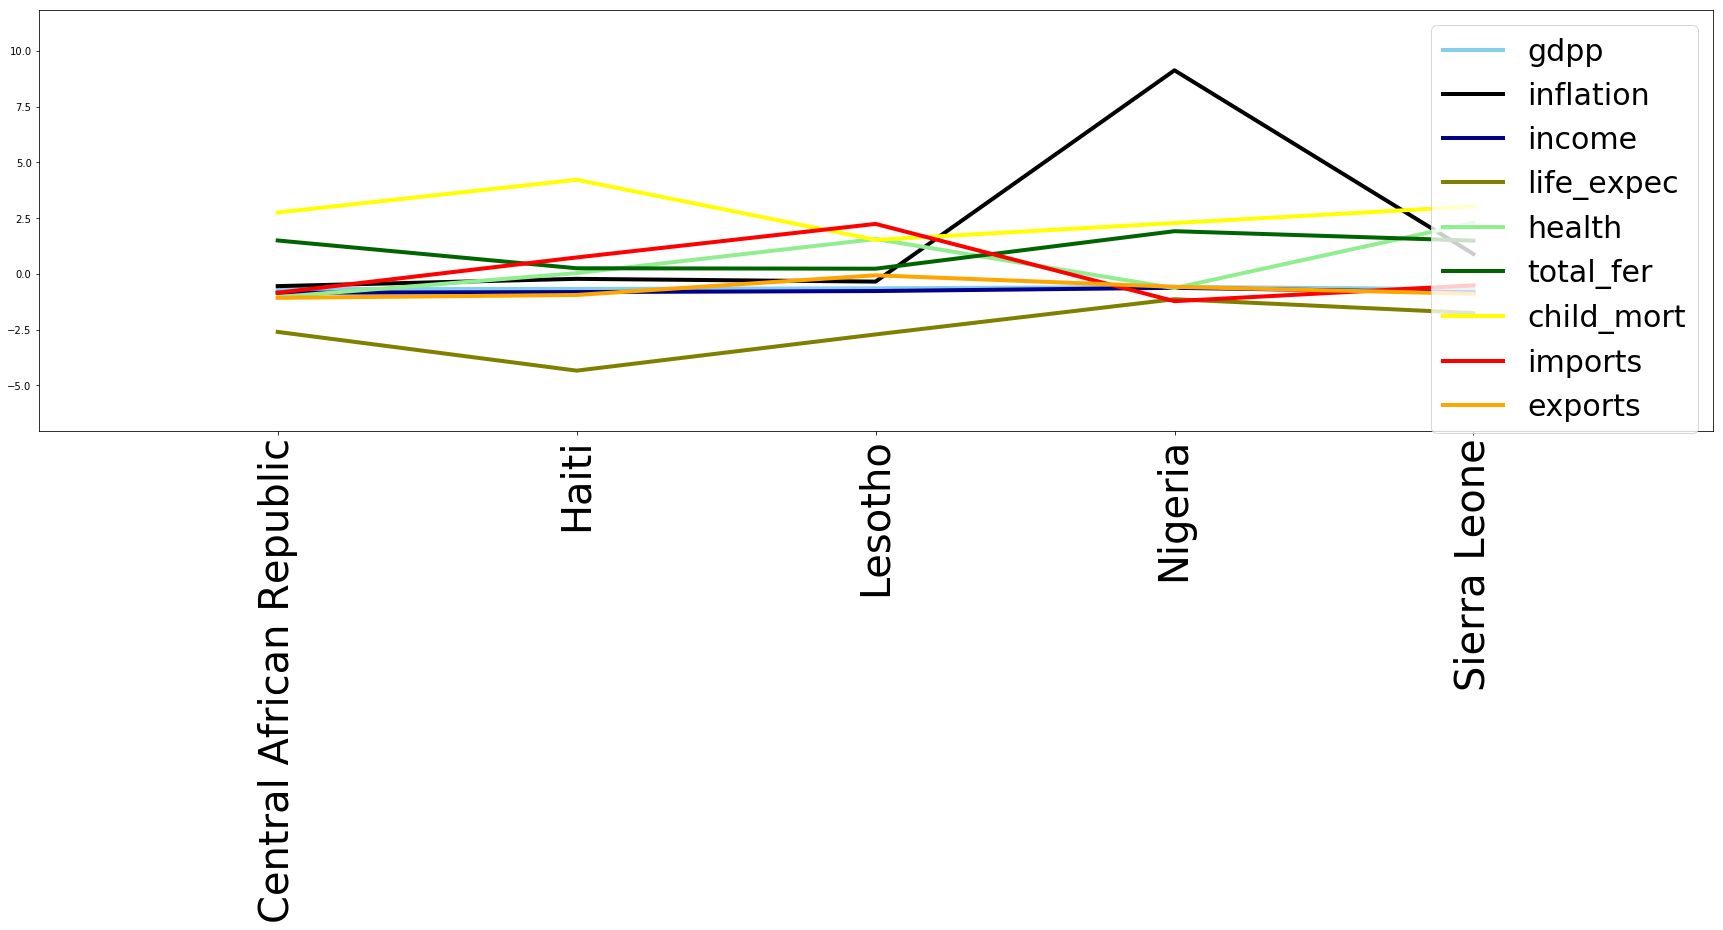

In [373]:
plt.figure(figsize = (30, 8))

#hc_6 = hc_5[hc_5['country'].isin(["Nigeria", "Togo", "Benin", "Central African Republic", "Haiti", "Lesotho", "Senegal", "Angola", "Sierra Leone", "Congo, Dem. Rep."])]
hc_6 = hc_5[hc_5['country'].isin(["Nigeria", "Sierra Leone", "Haiti", "Central African Republic", "Lesotho"])]

plt.plot('country', 'gdpp', data=hc_6, color='skyblue', linewidth=4)
plt.plot('country', 'inflation', data=hc_6, color='black', linewidth=4)
plt.plot('country', 'income', data=hc_6, color='darkblue', linewidth=4)
plt.plot('country', 'life_expec', data=hc_6, color='olive', linewidth=4)
plt.plot('country', 'health', data=hc_6, color='lightgreen', linewidth=4)
plt.plot('country', 'total_fer', data=hc_6, color='darkgreen', linewidth=4)
plt.plot('country', 'child_mort', data=hc_6, color='yellow', linewidth=4)
plt.plot('country', 'imports', data=hc_6, color='red', linewidth=4)
plt.plot('country', 'exports', data=hc_6, color='orange', linewidth=4)

plt.xticks(hc_6['country'], hc_6['country'], rotation='vertical', fontsize=40)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.legend(fontsize=30)
plt.show()


# Below are the Countries that are direst need of aid with the current situation stated per the available data. 

Nigeria (High Inflation, Low Income, Low GDP)

Sierra Leone (High Inflation, Low Income, Low GDP)

Haiti (Low Life Expectancy, High Fertility, High Child   Mortality, Low Health Spending)

Central African Republic (Low Life Expectancy, High Fertility, High Child Mortality, Low Health Spending)

Lesotho (Imports higher than Export)